<style>div.title-slide {    width: 100%;    display: flex;    flex-direction: row;            /* default value; can be omitted */    flex-wrap: nowrap;              /* default value; can be omitted */    justify-content: space-between;}</style><div class="title-slide">
<span style="float:left;">Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
<span><img src="media/both-logos-small-alpha.png" style="display:inline" /></span>
</div>


# `numpy` en dimension 1

## Complément - niveau basique

Dans cette première partie nous allons commencer avec des tableaux à une dimension, et voir comment les créer et les manipuler.

In [1]:
import numpy as np

### Création à partir de données

##### `np.array`

On peut créer un tableau `numpy` à partir d'une liste - ou plus généralement un itérable - avec la fonction `np.array` comme ceci :

In [2]:
array = np.array([12, 25, 32, 55])
array

array([12, 25, 32, 55])

**Attention** : une erreur commune au début consiste à faire ceci, qui ne marche pas :

In [5]:
try:
    array = np.array(1, 2, 3, 4)
except Exception as e:
    print("OOPS, {}, {}".format(type(e),e))

OOPS, <class 'ValueError'>, only 2 non-keyword arguments accepted


Ça marche aussi à partir d'un itérable :

In [4]:
builtin_range = np.array(range(10))
builtin_range

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Création d'intervalles

##### `np.arange`

Sauf que dans ce cas précis on préfèrera utiliser directement la méthode `arange` de `numpy` :

In [5]:
numpy_range = np.arange(10)
numpy_range

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Avec l'avantage qu'avec cette méthode on peut donner des bornes et un pas d'incrément qui ne sont pas entiers :

In [6]:
numpy_range_f = np.arange(1.0, 2.0, 0.1)
numpy_range_f

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9])

##### `np.linspace`

Aussi et surtout, lorsqu'on veut créer un intervalle dont on connaît les bornes, il est souvent plus facile d'utiliser `linspace`, qui crée un intervalle un peu comme `arange`, mais on lui précise un nombre de points plutôt qu'un pas :

In [8]:
X = np.linspace(0., 10., 50)
X

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

Vous remarquez que les 50 points couvrent à intervalles réguliers l'espace compris entre 0 et 10 inclusivement. Notons que 50 est aussi le nombre de points par défaut. Cette fonction est très utilisée lorsqu'on veut dessiner une fonction entre deux bornes, on a déjà eu l'occasion de le faire :

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

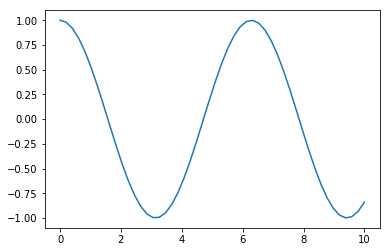

In [13]:
# il est d'usage d'ajouter un point-virgule à la fin de la dernière ligne
# si on ne le fait pas (essayez…), on obtient l'affichage d'une ligne
# de bruit qui n'apporte rien
Y = np.cos(X)
plt.plot(X, Y);

### Programmation vectorielle

Attardons-nous un petit peu :

* nous avons créé un tableau X de 50 points qui couvrent l'intervalle $[0..10]$ de manière uniforme ;
* nous avons calculé un tableau Y de 50 valeurs qui correspondent aux cosinus des nombres de X.

Remarquez qu'on a fait ce premier calcul **sans même savoir comment accéder aux éléments d'un tableau**. Vous vous doutez bien qu'on va accèder aux éléments d'un tableau à base d'index, on le verra bien sûr, mais on n'en a pas eu besoin ici.

En fait, avec `numpy`, on passe son temps à écrire des expressions dont les éléments sont des tableaux, et cela produit des opérations membre à membre, comme on vient de le voir avec cosinus.

Ainsi, pour tracer la fonction $x \longrightarrow cos^2(x) + sin^2(x) + 3$, on fera tout simplement :

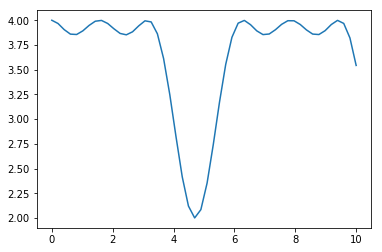

In [16]:
# l'énorme majorité du temps, on écrit avec numpy
# des expressions qui impliquent des tableaux
# exactement comme si c'était des nombres
Z = np.cos(X)**2 + np.sin(X)**3 + 3

plt.plot(X, Z);

C'est le premier réflexe qu'il faut avoir avec les tableaux `numpy` : on a vu que les compréhensions et les expressions génératrices permettent de s'affranchir des boucles du genre :
```Python
out_data = []
for x in in_data:
   out_data.append(une_fonction(x))
```
On a vu qu'en Python natif on ferait plutôt :
```Python
out_data = (une_fonction(x) for x in in_data)
```
Eh bien en fait, avec `numpy`, on doit penser encore plus court :
```Python
out_data = une_fonction(in_data)
```
Ou en tous cas à une expression qui fait intervenir `in_data` comme un tout, sans avoir besoin d'accéder à ses éléments.

##### `ufunc`

Le mécanisme général qui applique une fonction à un tableau est connu sous le terme de *Universal function*, ou `ufunc`, ça peut vous être utile avec les moteurs de recherche.

Voyez notamment la liste des [fonctionnalités disponibles sous cette forme dans `numpy`](https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html).

Je vous signale également un utilitaire qui permet, sous forme de décorateur, de passer d'une fonction scalaire à une `ufunc` :

In [18]:
# le décorateur np.vectorize vous permet
# de facilement transformer une opération scalaire
# en opération vectorielle
# je choisis à dessein une fonction définie par morceaux
@np.vectorize
def scalar_function(x):
    return x**2 + 2*x + (1 if x <=0 else 10)

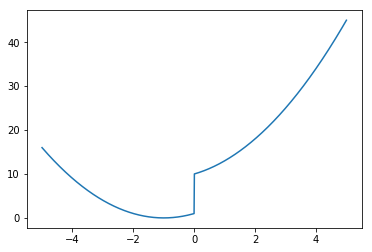

In [19]:
# je choisis de prendre beaucoup de points
# à cause de la discontinuité
X = np.linspace(-5, 5, 1000)
Y = scalar_function(X)
plt.plot(X, Y);

### Remarque - `ndarray` *vs* `array`

Je vous signale pour finir une petite incohérence au sujet de `array` et `ndarray`, comparés aux types de base de Python (ce ne sera pas, malheureusement, la seule…).

Pour construire une liste, on utilise `list` comme usine à fabriquer des listes. Logiquement ici, on devrait utiliser `np.ndarray` pour construire les tableaux, mais c'est `np.array` qu'il faut utiliser :

In [22]:
a = np.array([12, 25, 32, 55])
type(a)

numpy.ndarray

D'autant que bien évidemment la fonction `np.ndarray` existe aussi pour construire des tableaux mais elle offre une interface de plus bas niveau. Quoi qu'il en soit, en pratique ça n'est pas très important, car le plus souvent on fabrique ces tableaux avec une des multiples autres méthodes à notre disposition, on y reviendra.

### Conclusion

Pour conclure ce complément d'introduction, ce style de programmation - que je vais décider d'appeler programmation vectorielle de manière un peu impropre - est au cœur de `numpy`, et n'est bien entendu pas limitée aux tableaux de dimension 1, comme on va le voir dans la suite.